# Object Detection With Mask R-CNN

We are going to use a pre-trained Mask R-CNN model to detect objects on a new photograph. This Mask R-CNN have been trained on the  [MS COCO object detection problem](http://cocodataset.org/). In this note book we are going to predictions on our dataset without train with it.
## Load Model

In [1]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn import visualize
from matplotlib import pyplot
from matplotlib.patches import Rectangle

Using TensorFlow backend.
C:\Users\casiopa\anaconda3\envs\Mask-RCNN\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\casiopa\anaconda3\envs\Mask-RCNN\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\casiopa\anaconda3\envs\Mask-RCNN\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\casiopa\anaconda3\en

In [4]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for box in boxes_list:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

In [5]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [6]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

In [8]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('../model/mask_rcnn_coco.h5', by_name=True)

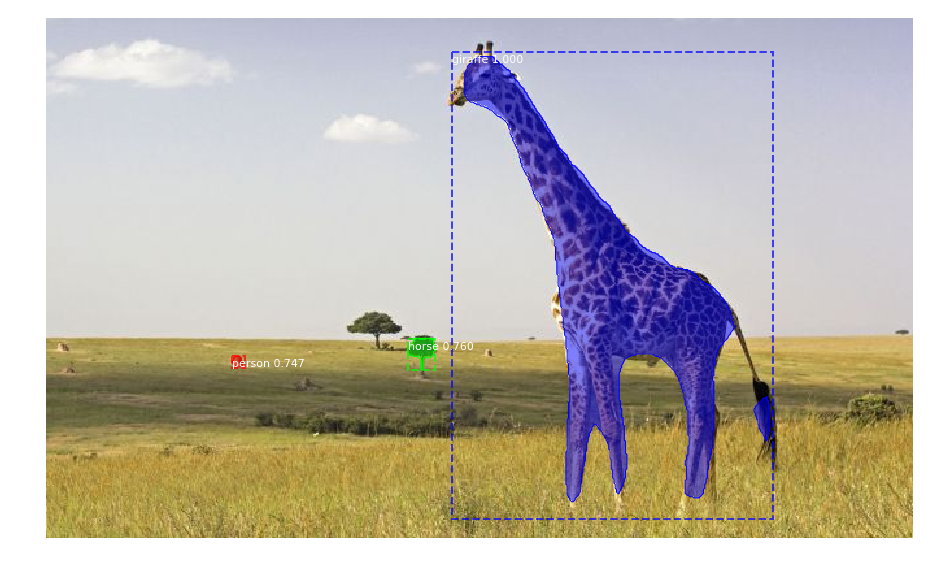

In [9]:
# load photograph
img = load_img('../data/test/jirafa-portada-668x400x80xX-1.jpg')
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

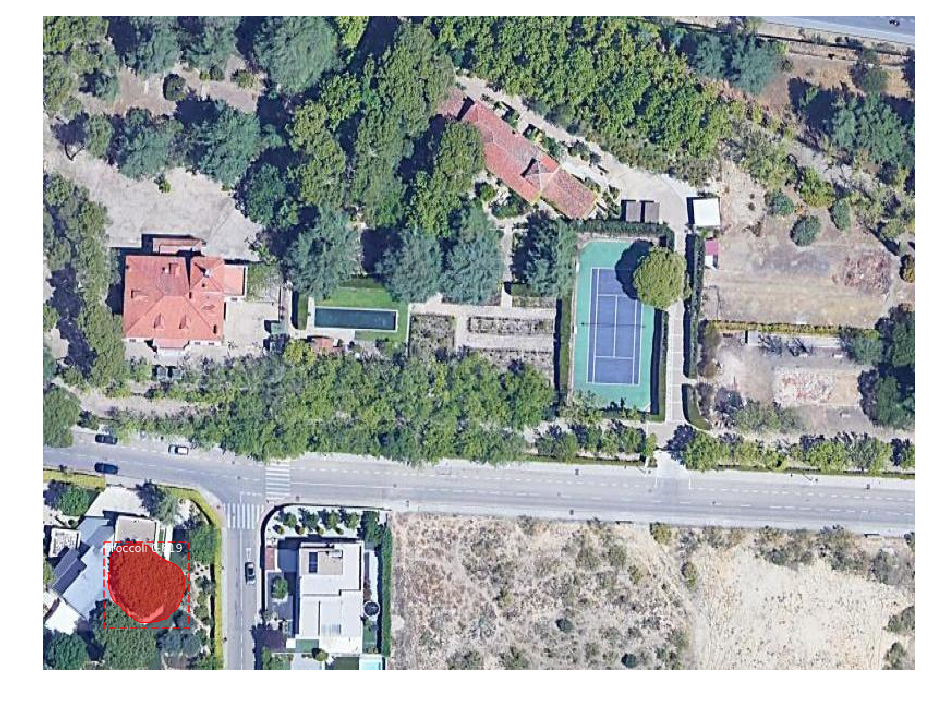

In [11]:
# load image from Rooftop dataset
img = load_img('../data/maps/train/aravaca 2021-09-12 163652.png')
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

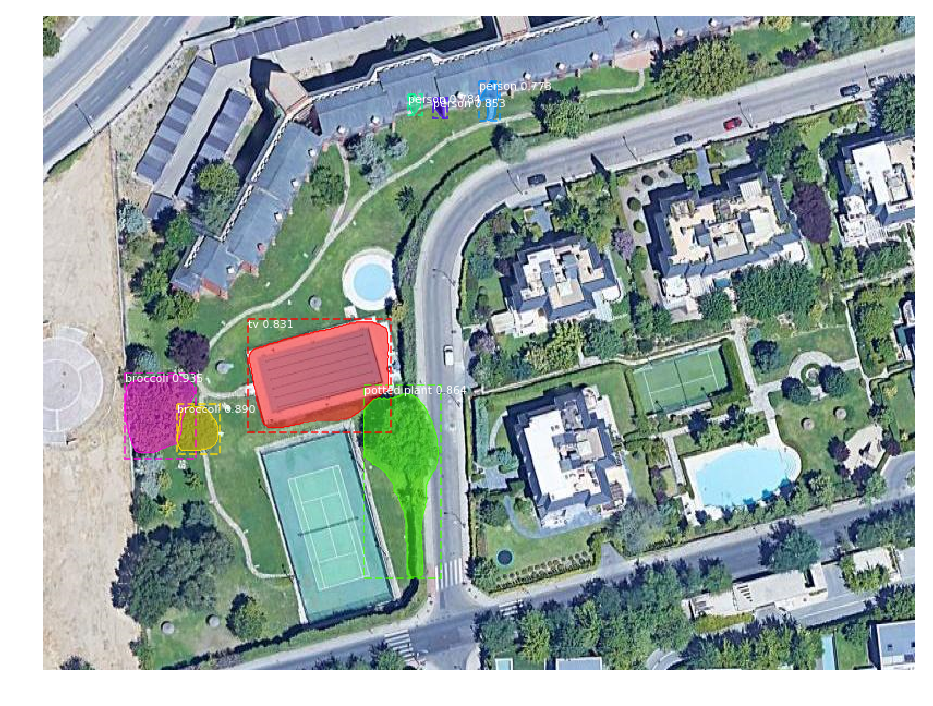

In [12]:
# load image from Rooftop dataset
img = load_img('../data/maps/train/aravaca 2021-09-12 163959.png')
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])